# Health Insurance cross sell prediction

Cross-sell PredictionPredict Health Insurance Owners' who will be interested in Vehicle Insurance.<br>
Here is the link to the <a href="https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction" target = "_blank">dataset</a>.

## Dataset:-

**`id`**  --> Unique ID for the customer<br>
**`Gender`** --> Gender of the customer<br>
**`Age`** --> Age of the customer<br>
**`Driving_License`** --> 0 : Customer does not have DL, 1 : Customer already has DL<br>
**`Region_Code`** --> Unique code for the region of the customer<br>
**`Previously_Insured`** -->1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance<br>
**`Vehicle_Age`** --> Age of the Vehicle<br>
**`Vehicle_Damage`** --> 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.<br>
**`Annual_Premium`** --> The amount customer needs to pay as premium in the year <br>
**`PolicySalesChannel`** --> Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.<br>
**`Vintage`** --> Number of Days, Customer has been associated with the company<br>
**`Response`** --> 1 : Customer is interested, 0 : Customer is not interested

## Let's import some libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes  import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
train = pd.read_csv(r"C:\Users\sarthak\Downloads\Kaggle Health Insurance\train.csv")

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train["Vehicle_Damage"] = le.fit_transform(train.Vehicle_Damage)

## Understanding the dataset

In [86]:
print("Summary: ")
print(train.describe())
print('\n')
print("Missing Values: ")
print(train.isna().sum())
print('\n')
print("Overall Response Rate: ")
print(train.Response.mean())

Summary: 
                  id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Vehicle_Damage  Annual_Premium  \
count       381109.000000   381109.000000   381109.000000   
mean             0.458210        0.504877    30564.389581   
std              0.498251        0.499977    17213.155057   
min              0.000000        0.000000     2630.000000   
25%              0.000000        0.000000    

#### Highlights:
1) There are no Missing values in the data. Oh Great!!! God is with us.<br>
2) The overall response rate is near to 12.25 percent.

In [4]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


## Hypothesis from the dataset

### Questions which can be solved with help of this dataset.
* Which feature has the highest significance on the response?
* Are they any targeting a particular gender? If yes, is it willingly or not. If not willingly, is there any way it can be corrected.
* Is previously insuring a vehicle a gender thing, like female are more likely to insure than male.
* Does gender play a role in vehicle damage?
* Which gender is more loyal customer?
* Is there any significance gap between annual premium paid by male and female?
* Which policy channel has highest conversion rate for each gender. Which channel is most used for contacting each gender.
* Age and gender, does it play any role in response...together. like male of age 40-50 are more likely to insure.
* Age and previously insured......does age play a role in insurance?
* Does age play role in vehicle damage?
* Which policy channel has influence over which age group.

### Function to get details of a particular feature-

In [5]:
def all_about_feature(feature):
    print("Unique values and their count: ")
    print(feature.value_counts())
    print("\n")
    print("Response Rate: ")
    print(train.groupby(feature)["Response"].mean().sort_values(ascending=False))
    print("\n")
    print("Total Response received: ")
    print(train.groupby(feature)["Response"].count())

### Let's start with analyzing Gender feature

Unique values and their count: 
Male      206089
Female    175020
Name: Gender, dtype: int64


Response Rate: 
Gender
Male      0.138411
Female    0.103902
Name: Response, dtype: float64


Total Response received: 
Gender
Female    175020
Male      206089
Name: Response, dtype: int64


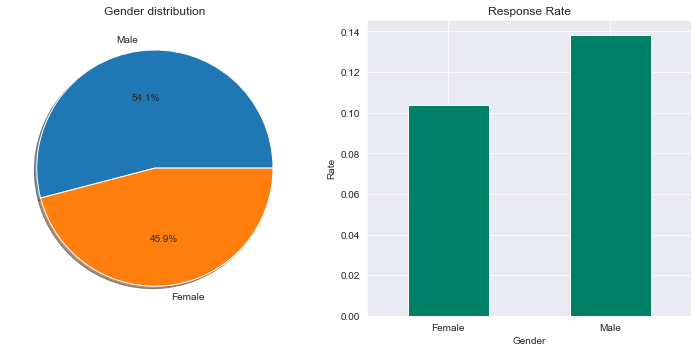

In [21]:
all_about_feature(train.Gender)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(train.Gender.value_counts(),labels=["Male",'Female'],shadow=True,autopct='%1.1f%%')
plt.title("Gender distribution")
plt.tight_layout()
plt.subplots_adjust(wspace=1)
plt.subplot(1,2,2)
train.groupby("Gender")["Response"].mean().plot(kind='bar',cmap='summer')
plt.title("Response Rate")
plt.ylabel("Rate")
plt.xticks(rotation="horizontal")
plt.tight_layout()

1) There are 54 percent Male and 46 percent Female in the dataset.<br>
2) Response rate of Male is 13 percent while response rate of female is 10 percent. The response rate of male is nearly **30** percent more than that of female.<br>
3) `There are more male customers, which may be an intentional thing because response rate is higher for male. So, it is reasonable to target more male customers.`

### Is vehicle getting previously insured a "Gender" thing?

In [22]:
train.groupby("Gender")["Previously_Insured"].mean()
#Can be represented as key points after a topic ends.

Gender
Female    0.502508
Male      0.420590
Name: Previously_Insured, dtype: float64

From this data, it seems more female get their vehicle insured. **19** percent more female get vehicle insured as compared to male.

### Let's check, what happens to response rate of particular gender when they previously insured.

In [25]:
print("When it is previously not insured:")
print(train[train.Previously_Insured==0].groupby("Gender")["Response"].mean())
print("\n")
print("When it is previously insured: ")
print(train[train.Previously_Insured==1].groupby("Gender")["Response"].mean())
train.groupby(["Gender","Previously_Insured"]).Response.mean()

When it is previously not insured:
Gender
Female    0.208140
Male      0.238079
Name: Response, dtype: float64


When it is previously insured: 
Gender
Female    0.000705
Male      0.001108
Name: Response, dtype: float64


Gender  Previously_Insured
Female  0                     0.208140
        1                     0.000705
Male    0                     0.238079
        1                     0.001108
Name: Response, dtype: float64

##### There is huge difference between response rate of particular gender when they have previously insured. By which we can imply, previously_insured is a good metric for response rate.

## Let's check whether vehicle damage a gender thing?

Gender
Female    0.455177
Male      0.547084
Name: Vehicle_Damage, dtype: float64


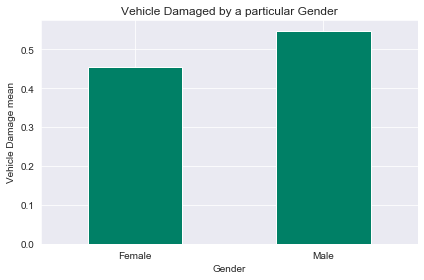

In [28]:
print(train.groupby("Gender")["Vehicle_Damage"].mean())
train.groupby("Gender")["Vehicle_Damage"].mean().plot(kind='bar',cmap='summer')
plt.xlabel("Gender")
plt.xticks(rotation='horizontal')
plt.ylabel("Vehicle Damage mean")
plt.title("Vehicle Damaged by a particular Gender")
plt.tight_layout()

From the data, it seems more Male are involved in vehicle damage than Female.

## Vehicle Damage - Feature analysis

When vehicle is not damaged, the conversion rate is: 
Gender
Female    0.004384
Male      0.006042
Name: Response, dtype: float64


When vehicle is damaged, the conversion rate is: 
Gender
Female    0.223021
Male      0.247996
Name: Response, dtype: float64


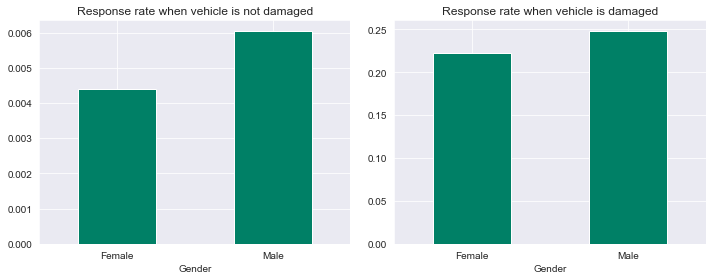

In [12]:
print("When vehicle is not damaged, the conversion rate is: ")
print(train[train.Vehicle_Damage==0].groupby("Gender")["Response"].mean())
print("\n")
print("When vehicle is damaged, the conversion rate is: ")
print(train[train.Vehicle_Damage==1].groupby("Gender")["Response"].mean())
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
train[train.Vehicle_Damage==0].groupby("Gender")["Response"].mean().plot(kind='bar',cmap='summer')
plt.subplots_adjust(wspace=0.5)
plt.xticks(rotation='horizontal')
plt.title("Response rate when vehicle is not damaged")
plt.subplot(1,2,2)
train[train.Vehicle_Damage==1].groupby("Gender")["Response"].mean().plot(kind='bar',cmap='summer')
plt.xticks(rotation='horizontal')
plt.title("Response rate when vehicle is damaged")
plt.tight_layout() 

1) Response rate is much higher when vehicle is damaged as compared to when it is not damaged.<br>
2) Response rate when vehicle is damaged is nearly 40 times when vehicle is not damaged. This means, damaged vehicle incites some fear to get insurance.

In [9]:
train.groupby("Gender")["Vintage"].mean()

Gender
Female    154.575917
Male      154.153327
Name: Vintage, dtype: float64

Both the gender have similar vintage (same number of days after becoming customer)

In [13]:
train.groupby("Gender")["Annual_Premium"].mean()

Gender
Female    30495.787990
Male      30622.649122
Name: Annual_Premium, dtype: float64

There is not much difference in annual premium paid by both the gender.

### Are different gender contacted via different medium?

In [14]:
print(train.groupby("Gender")["Policy_Sales_Channel"].agg(Series.mode))
print('\n')
print("Response Rate:")
print("Male:")
print(train[((train.Policy_Sales_Channel==152) & (train.Gender=="Male"))].Response.mean())
print("Female:")
print(train[((train.Policy_Sales_Channel==152) & (train.Gender=="Female"))].Response.mean())

Gender
Female    152.0
Male      152.0
Name: Policy_Sales_Channel, dtype: float64


Response Rate:
Male:
0.03495188774376592
Female:
0.023769255981645362


* This implies that similar mode of communication is used for both the gender.
* The most frequent mode of communication used has response rate as low as 2-3 percent for both male and female.
* **What is the idea behind still using it as frequently. Is it cheaper or easily accessible?**

In [14]:
train[train.Gender=="Female"].groupby(["Policy_Sales_Channel"])["Response"].mean().sort_values(ascending=False)

Policy_Sales_Channel
123.0    1.000000
101.0    0.500000
81.0     0.500000
36.0     0.400000
155.0    0.343866
           ...   
38.0     0.000000
82.0     0.000000
83.0     0.000000
32.0     0.000000
79.0     0.000000
Name: Response, Length: 140, dtype: float64

In [15]:
train[train.Gender=="Male"].groupby(["Policy_Sales_Channel"])["Response"].mean().sort_values(ascending=False)

Policy_Sales_Channel
43.0     1.000000
68.0     0.500000
100.0    0.500000
28.0     0.500000
87.0     0.333333
           ...   
105.0    0.000000
46.0     0.000000
84.0     0.000000
108.0    0.000000
144.0    0.000000
Name: Response, Length: 151, dtype: float64

In [35]:
train.groupby("Policy_Sales_Channel")["Response"].mean().sort_values().tail(10)

Policy_Sales_Channel
80.0     0.285714
121.0    0.296875
3.0      0.304015
163.0    0.304183
155.0    0.320097
36.0     0.326923
28.0     0.333333
27.0     0.333333
43.0     1.000000
123.0    1.000000
Name: Response, dtype: float64

#### No conclusions can be drawn as count of some policy sales channel is very low, less than 10-20.

## Age Analysis

In [45]:
all_about_feature(train.Age)

Unique values and their count: 
24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64


Response Rate: 
Age
38    0.228546
36    0.227398
35    0.225284
34    0.220020
47    0.218610
        ...   
21    0.034879
82    0.034483
20    0.027439
84    0.000000
85    0.000000
Name: Response, Length: 66, dtype: float64


Total Response received: 
Age
20     6232
21    16457
22    20964
23    24256
24    25960
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Response, Length: 66, dtype: int64


In [15]:
train[train.Age>80].Response.mean()

0.046511627906976744

#### The response rate of people with age greater than 80 years is near to 4 percent.

### Analysis for creating bucket for age:

We can see it is tough  to draw any conclusion with just using age. We need to regularise the age feature so that we can draw conclusion and some kind of insights from the data.<br>
We can plot histogram and decide bucket size according to that. And once we create the bucket, we will analyse it with other features in the train dataset. Also, does bucketing help in drawing some conclusions? We will get the answer to that question.

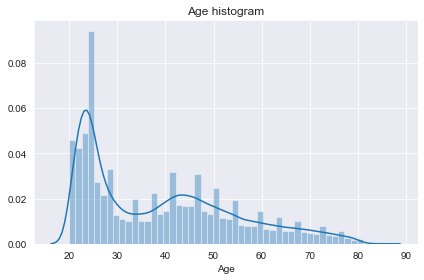

In [30]:
sns.distplot(train.Age)
#suggested age bucket = 20 - 35,35-55 , 55-80.
plt.xlabel("Age")
plt.title("Age histogram")
plt.tight_layout()

We can see three different distributions in the whole histogram. First distribution is from age 20 to 35, it is bit like normal distribution which is tall and skinny. Second distribution is from 35 to 55, which also looks like normal distribution which is short and fat. Final and third distribution is like some inverse linear function as count is falling as age is increasing.<br>
 
#### 3 buckets which we will be created (a) 20 - 35 (b) 35-55 (c) 55 and above.

### Let's create Age bucket :

In [18]:
def bucket(ser):
    if ser>55:
        return "C"
    elif ser>35:
        return "B"
    else:
        return "A"
    
train["Age_Bucket"] = train.Age.apply(bucket)

### Analyzing the age bucket : 

Unique values and their count: 
A    186812
B    132081
C     62216
Name: Age_Bucket, dtype: int64


Response Rate: 
Age_Bucket
B    0.206805
C    0.114922
A    0.065547
Name: Response, dtype: float64


Total Response received: 
Age_Bucket
A    186812
B    132081
C     62216
Name: Response, dtype: int64


Text(0, 0.5, 'Rate')

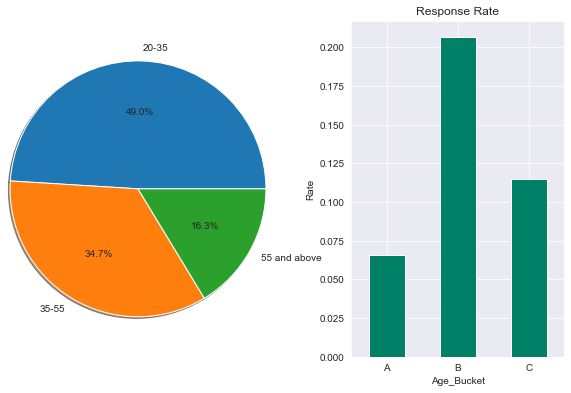

In [19]:
all_about_feature(train.Age_Bucket)
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.pie(train["Age_Bucket"].value_counts(),labels=["20-35","35-55","55 and above"],shadow=True,autopct='%1.1f%%',radius=1.5)
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,2)
train.groupby("Age_Bucket")["Response"].mean().plot(kind='bar',cmap='summer')
plt.xticks(rotation='horizontal')
plt.title("Response Rate")
plt.ylabel("Rate")

1) Around 50 percent of the total people are younger than 35.<br>
2) Response rate is highest in "B" bucket followed by "C" and its lowest in "A" bucket .<br>
3) Response rate for bucket "C" is nearly 4 times as "A" while double of "C".<br>
4) People from 35-55 seems to be a much better to approach for insurance.<br>
5) One reason for such low response rate in "A" bucket can be people are really young and could not afford vehicle at first place. <br>

**The age group 20-35 seems to be most targeted despite having very less response rate as compared  to other age groups. Instead, we can target more people in the bucket of 35-55 age group, which has highest response rate.** 

Age_Bucket  Gender
A           Female    0.053691
            Male      0.079481
B           Female    0.203914
            Male      0.208596
C           Female    0.104504
            Male      0.121272
Name: Response, dtype: float64


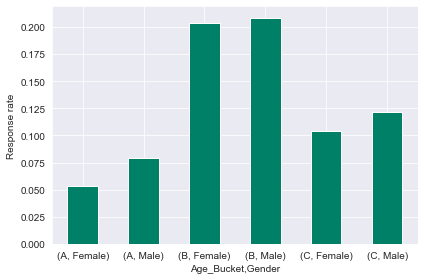

In [21]:
print(train.groupby(["Age_Bucket","Gender"]).Response.mean())
train.groupby(["Age_Bucket","Gender"]).Response.mean().plot(kind='bar',cmap='summer')
plt.xticks(rotation='horizontal')
plt.ylabel("Response rate")
plt.tight_layout()

There is not much difference in response rate for female and male in various age bucket. <br>Age bucket behaves similar for either of the gender.

In [50]:
train.groupby(["Age_Bucket","Previously_Insured"]).Response.mean()

Age_Bucket  Previously_Insured
A           0                     0.171385
            1                     0.000708
B           0                     0.286274
            1                     0.001735
C           0                     0.177034
            1                     0.000548
Name: Response, dtype: float64

#### Vehicles which are previously insured have much lower response rate. So combining with other features will not tell us anything insightful.

### Is there any relation between vehicle damage and age group?

Age_Bucket
A    0.338506
B    0.682172
C    0.628038
Name: Vehicle_Damage, dtype: float64


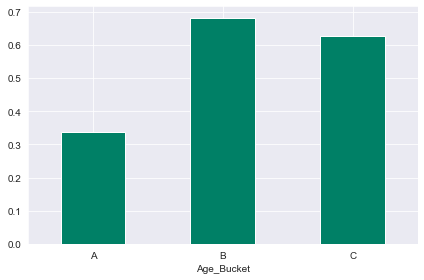

In [53]:
print(train.groupby("Age_Bucket").Vehicle_Damage.mean())
train.groupby("Age_Bucket").Vehicle_Damage.mean().plot(kind='bar',cmap='summer')
plt.xticks(rotation='horizontal')
plt.tight_layout()

* Age bucket "A" (20-35) people have very less damaged vehicle. This implies that young people tend to have less vehicle damage than any other age group of people.
* Different age groups have different chances of vehicle damage. 

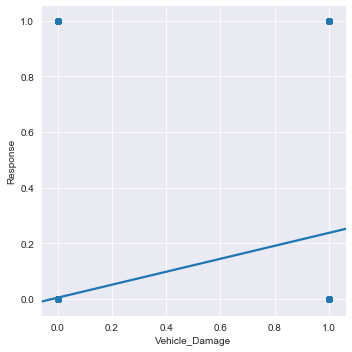

In [58]:
sns.lmplot("Vehicle_Damage","Response",data=train)

#### There is little positive correlation between Vehicle Damage and Response which means when a vehicle is damaged it has higher probablity to get response.

Age_Bucket
A    29670.942696
B    30581.101922
C    33211.606002
Name: Annual_Premium, dtype: float64


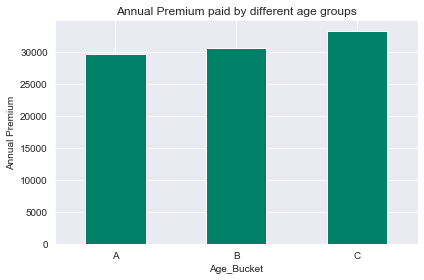

In [23]:
print(train.groupby("Age_Bucket").Annual_Premium.mean())
plt.figure(figsize=(6,4))
train.groupby("Age_Bucket").Annual_Premium.mean().plot(kind='bar',cmap='summer')
plt.xticks(rotation='horizontal')
plt.ylabel("Annual Premium")
plt.title("Annual Premium paid by different age groups")
plt.tight_layout()

There is slight variation in annual premium paid by different age groups.<br>
**As the age increases, chances of paying higher annual premium increases.**

### Are different age groups targeted using same or different Policy channel?

In [71]:
print(train.groupby("Age_Bucket").Policy_Sales_Channel.agg(Series.mode))
print("\n")
print("Response rate for most used communication:")

print("A:- ",train[((train.Age_Bucket=="A")&(train.Policy_Sales_Channel==152))].Response.mean())
print("B:- ",train[((train.Age_Bucket=="B")&(train.Policy_Sales_Channel==124))].Response.mean())
print("C:- ",train[((train.Age_Bucket=="C")&(train.Policy_Sales_Channel==26))].Response.mean())

Age_Bucket
A    152.0
B    124.0
C     26.0
Name: Policy_Sales_Channel, dtype: float64


Response rate for most used communication:
A:-  0.02849493510356813
B:-  0.19860127895288407
C:-  0.133086876155268


1) Different age group are targeted by different policy sales channel.<br>
2) By the response rate, it seems "A" has very poor response rate. This implies the mode of communication used for "A" is not effective. <br>
3) Response rate for "B" is very good, which implies mode of communication used is working.<br>

### Is there any relation between Vehicle damage and previously insured?

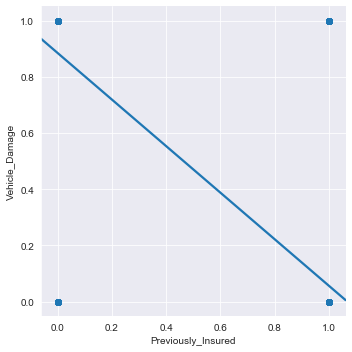

In [76]:
sns.lmplot("Previously_Insured","Vehicle_Damage",data=train)

**`Previously Insured and Vehicle damage have very strong negative correlation.`**

### Is there any relation between previously insured and response?

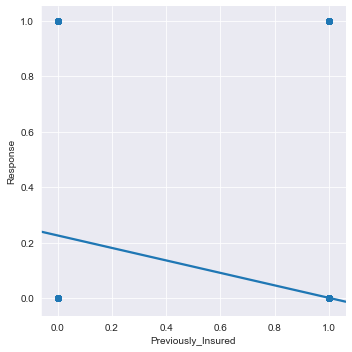

In [77]:
sns.lmplot("Previously_Insured","Response",data=train)

**Previously Insured and response have very slight negative correlation.**

Vehicle_Age
1-2 Year     30523.582120
< 1 Year     30119.552025
> 2 Years    35654.499469
Name: Annual_Premium, dtype: float64


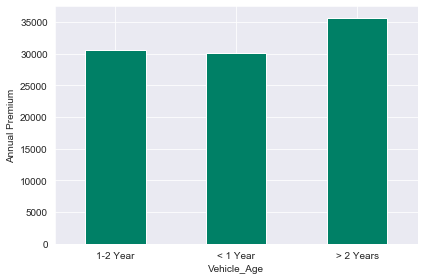

In [29]:
print(train.groupby("Vehicle_Age").Annual_Premium.mean())
train.groupby("Vehicle_Age").Annual_Premium.mean().plot(kind='bar',cmap='summer')
plt.xticks(rotation='horizontal')
plt.ylabel("Annual Premium")
plt.tight_layout()


Annual premium has some correlation with Vehicle age. Annual premium goes higher as vehicle age increases. Once the vehicle is more than 2 years old, premium increase exponentially.

### Is there any kind of relation between Vehicle Age and Vehicle damage?

Ideally, there should be a direct relationship between vehicle age and vehicle damage. As the age of vehicle increases, there is high chances of vehicle damage. Let's see what does the data say.

Vehicle_Age
1-2 Year     0.640114
< 1 Year     0.292476
> 2 Years    0.999063
Name: Vehicle_Damage, dtype: float64


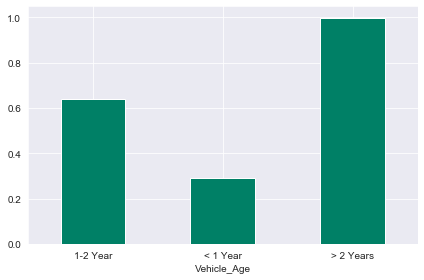

In [82]:
print(train.groupby("Vehicle_Age").Vehicle_Damage.mean())
train.groupby("Vehicle_Age").Vehicle_Damage.mean().plot(kind='bar',cmap='summer')
plt.xticks(rotation='horizontal')
plt.tight_layout()

1) Vehicle damage for vehicle whose age is greater than 2 years is near to 1. This implies, vehicle which are more than 2 years old have undergone damage.<br>
2) Vehicle Damage exponential changes with vehicle age increases.<br>
3) There is more than 100 percent increase in vehicle damage when vehicle age increases from <1 to 1-2 years. <br>
4) There is nearly 33 percent increase in vehicle damage when vehicle age increases from 1-2 to >2 years.

### Does age of vehicle affect response?

Vehicle_Age
1-2 Year     0.173755
< 1 Year     0.043705
> 2 Years    0.293746
Name: Response, dtype: float64


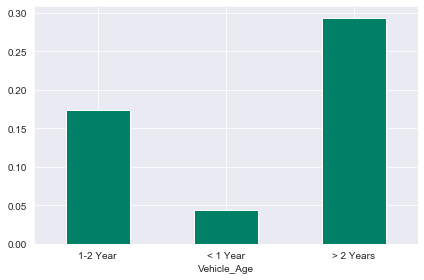

In [85]:
print(train.groupby("Vehicle_Age")["Response"].mean())
train.groupby("Vehicle_Age")["Response"].mean().plot(kind='bar',cmap='summer')
plt.xticks(rotation='horizontal')
plt.tight_layout()

#### There is some correlation between Vehicle Age and Response.
1) As vehicle age increases probablity of getting response increases.<br>
2) Response rate increase by more than 400 percent as vehicle age increases from <1 years to 1-2 years.<br>
3) Response rate increases by nearly 70 percent as vehicle age increases from 1-2 years to >2 years.

# Summary 

* More male can be targeted for better response rate.
* More female get their vehicle insured.
* When vehicle is previously insured, it has very low response rate.
* Response rate is much higher when a vehicle is already damaged.
* There is no difference between annual premium paid by both the gender.
* Policy sales channel used most frequently for both the gender has very low response rate. Change in policy saled channel is required.
* People in age group of 20-35 are targeted most even having least response rate. Different age group should be targeted to increase response rate. However, there is one question, why there is low reponse rate  young age group. 
* Young people tend to not involve in vehicle damage.
* Annual premium increases with age.
* Different age groups are using different policy sales channels, out of which 20-35 age group has very low response rate. Is there any issue with the kind of policy sales channel we are using to target young people.
* Vehicle damage is propotional to age of vehicle. According to the data, almost 100 percent vehicles are damaged whose age is greater than 2 years.
* Vehicle age is propotional to response rate. Vehicle with age greater than 2 years has response rate near to 30 percent.